In [2]:
#pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('Car_Price_Prediction.csv')
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [5]:
df.info()# no null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

In [6]:
df.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


In [7]:
df['Year'].unique()
df['Engine Size'].unique()


array([3.9, 1.7, 4.1, 2.6, 3.4, 2.7, 1.3, 2. , 4.4, 2.1, 4.5, 4. , 3.1,
       1.1, 4.2, 3. , 2.2, 1.5, 2.9, 1. , 1.2, 3.5, 1.9, 3.8, 4.3, 1.6,
       2.8, 2.4, 1.8, 3.7, 3.6, 3.3, 2.5, 2.3, 1.4, 3.2])

In [8]:
df.info()
df['Model'].unique()# checking if any disrespency in model column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


array(['Model B', 'Model C', 'Model A', 'Model D', 'Model E'],
      dtype=object)

In [9]:
df['Make'].unique()#checking any disrepency in categorical(string) columns

array(['Honda', 'Ford', 'BMW', 'Audi', 'Toyota'], dtype=object)

In [10]:
df['Fuel Type'].unique()

array(['Petrol', 'Electric', 'Diesel'], dtype=object)

In [11]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

<Axes: ylabel='Year'>

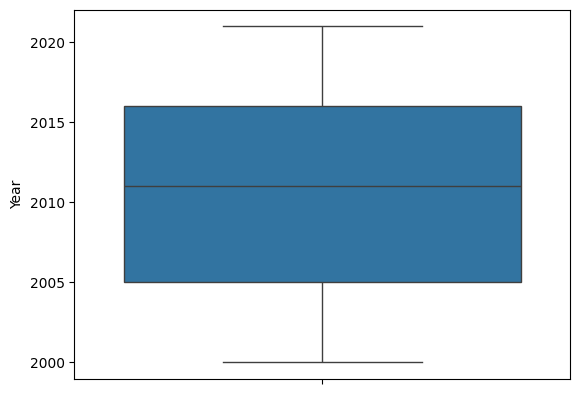

In [12]:
sns.boxplot(y='Year',data=df)# no outliers but I wanted the car's current age

In [13]:
df['current_age'] = 2025-df['Year']
df.head()
df['current_age'].value_counts()

current_age
11    58
17    57
9     56
10    55
25    54
16    52
22    50
15    49
13    48
4     47
7     44
8     44
12    43
6     42
14    40
5     40
23    40
24    39
21    38
19    36
20    36
18    32
Name: count, dtype: int64

<Axes: ylabel='current_age'>

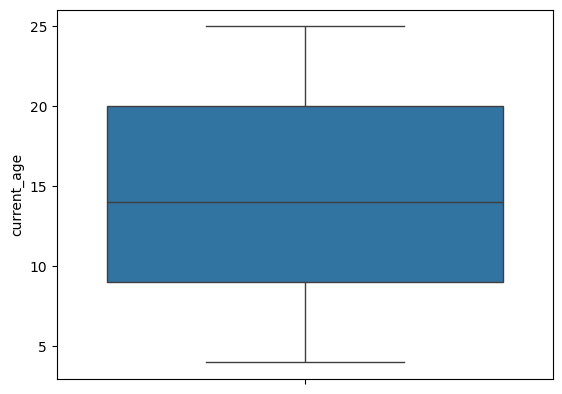

In [14]:
#check outliers with respect to current_age
sns.boxplot(y='current_age',data=df)

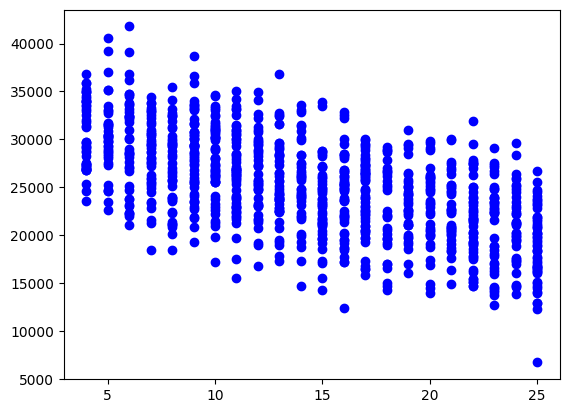

In [15]:
plt.scatter(df['current_age'],df['Price'],color='blue')# car's age increases and price decreases

<Axes: ylabel='Engine Size'>

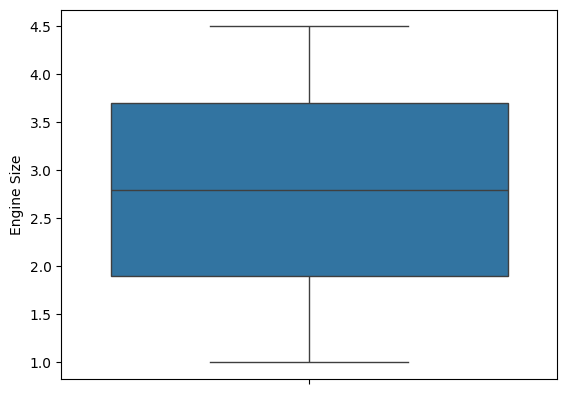

In [16]:
# handling outliers in engine column
sns.boxplot(y='Engine Size',data=df)# no outliers

<Axes: ylabel='Mileage'>

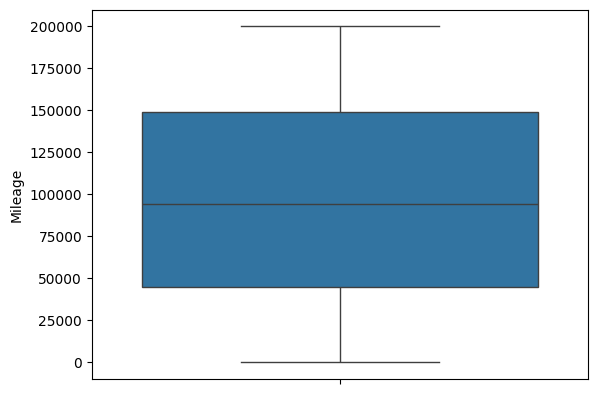

In [17]:
sns.boxplot(y='Mileage',data=df)# no outliers

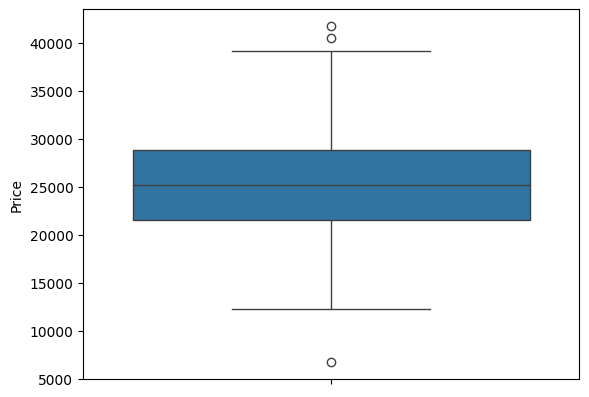

In [18]:
sns.boxplot(df['Price'])
plt.show()# very less and these variations are quite possible

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
 8   current_age   1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [20]:
#here I want to interchnge the indexes of price and current_age
cols = df.columns.tolist()
idx_price = cols.index('Price')
idx_age = cols.index('current_age')

# Swap positions
cols[idx_price], cols[idx_age] = cols[idx_age], cols[idx_price]

df = df[cols]
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,current_age,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,10,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,11,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,19,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,10,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21,21021.386657


In [21]:
copied_dataset=df.copy()
copied_dataset.to_csv("copy.csv")

In [22]:
# Using encoding to convert string to numeric
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
df['Model'] = obj.fit_transform(df['Model'])
df.head()
df['Model'].value_counts()

Model
1    212
2    205
0    202
3    197
4    184
Name: count, dtype: int64

In [23]:
ob=LabelEncoder()
df['Make']=ob.fit_transform(df['Make'])
df['Fuel Type']=ob.fit_transform(df['Fuel Type'])
df['Transmission']=ob.fit_transform(df['Transmission'])
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,current_age,Price
0,3,1,2015,3.9,74176,2,1,10,30246.207931
1,2,2,2014,1.7,94799,1,0,11,22785.747684
2,1,1,2006,4.1,98385,1,1,19,25760.290347
3,3,1,2015,2.6,88919,1,0,10,25638.003491
4,3,2,2004,3.4,138482,2,0,21,21021.386657


In [24]:
df['Make'].value_counts()

Make
2    225
0    212
3    198
4    187
1    178
Name: count, dtype: int64

In [25]:
df['Fuel Type'].value_counts()

Fuel Type
0    344
2    331
1    325
Name: count, dtype: int64

In [26]:
df['Transmission'].value_counts()

Transmission
1    511
0    489
Name: count, dtype: int64

In [27]:
df.info()# converted everything to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   int64  
 1   Model         1000 non-null   int64  
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   int64  
 6   Transmission  1000 non-null   int64  
 7   current_age   1000 non-null   int64  
 8   Price         1000 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


In [28]:
df.head()# dividing training and testing


X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [29]:

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [30]:
Model=RandomForestRegressor(random_state=42)

In [31]:
parametres={
'max_depth' : [2,3,4],
'n_estimators' : [40,60,80]

}

In [32]:
Grid=GridSearchCV(estimator=Model,param_grid=parametres,cv=5)
Grid.fit(Xtrain,Ytrain)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [2, 3, ...], 'n_estimators': [40, 60, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,60


In [33]:
Grid.score(Xtrain,Ytrain)

0.8182032458318464

In [34]:
Grid.score(Xtest,Ytest)# a generalized model 

0.7537406196147655

In [35]:
Y_pred=Grid.predict(Xtest)
r2_score(Ytest,Y_pred)

0.7537406196147655

In [36]:
with open("RFmod.pkl",'wb') as file:
    pickle.dump(Grid,file)

In [37]:
print(sklearn.__version__)

1.7.1


In [38]:
import sys
print(sys.version)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
